In [375]:
import pandas as pd
import altair as alt
import numpy as np
import scipy
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt
import time

In [376]:
raw_data_hr = pd.read_json('data_dump_spo2.json', orient='index')
raw_data_hr['tst'] = raw_data_hr['tst'] * 1000
raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] != 0) & (raw_data_hr['red'] != 0)]
#aw_data_hr.rename(columns={'raw_readings_ir':'ir', 'raw_readings_red':'red'}, inplace=True)
#raw_data_hr = raw_data_hr.loc[(raw_data_hr['ir'] > 50000) & (raw_data_hr['red'] != 0)].reset_index(drop=True).reset_index()
#raw_data_hr = raw_data_hr.loc[raw_data_hr.index<5000]
raw_data_hr #[['raw_readings_ir','raw_readings_red']]

,result_red,mean_red,w_ir,result_ir,ir,w_red,tst,mean_ir,red
0,32480.000000,32480.000000,51048.000000,51048.000000,51048,32480.000000,1594420354665000,51048.000000,32480
1,30952.000000,31716.000000,99599.600000,48551.600000,51104,63432.000000,1594420354666000,49799.800000,32576
2,29612.400000,31014.800000,145971.620000,46372.020000,51352,93044.400000,1594420354667000,48657.206667,32784
3,28251.780000,30324.045000,190257.039000,44285.419000,51584,121296.180000,1594420354668000,47564.259750,32904
4,26807.191000,29620.674200,232312.187050,42055.148050,51568,148103.371000,1594420354669000,46462.437410,32872
...,...,...,...,...,...,...,...,...,...
4996,1.486845,-3.685139,1003.627694,-2.296194,48,2371.749954,1594420447699000,-0.937282,120
4997,-14.587498,-5.100882,1009.446309,5.818615,56,2357.162456,1594420447738000,1.509582,104
4998,-5.858123,-5.645838,1014.973994,5.527685,56,2351.304334,1594420447775000,2.234103,112
4999,-5.565217,-5.363546,1012.225294,-2.748700,48,2345.739117,1594420447808000,3.722398,112


In [377]:
i_rms_red = np.sqrt(raw_data_hr[2000:4000]['result_red'].apply(lambda j: j*j).sum()/len(x))
i_dc_red = 40200
i_rms_ir = np.sqrt(raw_data_hr[2000:4000]['result_ir'].apply(lambda j: j*j).sum()/len(x))
i_dc_ir = 27100
R = (i_rms_red * 600 * i_dc_ir) / (i_rms_ir * 900 * i_dc_red) 

R

TypeError: object of type 'numpy.float64' has no len()

In [378]:
0.98 = K1 -  K2 * 0.259

0.94 = K1 -  K2 * 0.19

0.94 = K1 -  K2 * 0.19

SyntaxError: can't assign to literal (<ipython-input-378-0ce4401b2a64>, line 1)

In [379]:
b, a = scipy.signal.butter(1, 0.01, 'low', fs=1, output='ba')
raw_data_hr['butterworth_red'] = scipy.signal.filtfilt(b, a, raw_data_hr['result_red'])

data = raw_data_hr[2000:]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

AttributeError: module 'scipy' has no attribute 'signal'

In [344]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [345]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [346]:
data = raw_data_hr[2000:2500]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [347]:
data = raw_data_hr[2000:4000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='mean_red',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [348]:
raw_data_hr_melted = raw_data_hr.melt(value_vars=['ir','red'], id_vars='tst')
raw_data_hr_melted

,tst,variable,value
0,1593276147668000,ir,42600
1,1593276147669000,ir,42616
2,1593276147670000,ir,42656
3,1593276147671000,ir,42432
4,1593276147672000,ir,42024
...,...,...,...
9997,1593276208121000,red,33928
9998,1593276208146000,red,33848
9999,1593276208172000,red,33792
10000,1593276208195000,red,33768


In [349]:
data = raw_data_hr[1000:2000]
alt.Chart(data).mark_line().encode(
    x='tst',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [350]:
alt.Chart(raw_data_hr_melted).mark_line().encode(
    x='tst',
    y=alt.Y('value:Q',
        scale=alt.Scale(domain=(10000, 65000))
    ),
    color='variable'
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

In [351]:
class dcFilter_t:
    def __init__(self):
        self.w = None
        self.result = None

def dc_filter(x, alpha=0.95):
    print(x.ir, x.name)
    if x.name ==0:
        prev_w = 0
    filtered = {'w':None, 'result': None}
    filtered['w'] = x.ir + alpha * prev_w ;
    filtered['result'] = filtered['w'] - prev_w;
    return filtered



In [352]:
def _wR(i, col):
    x_i = raw_data_hr_melted.loc[raw_data_hr_melted['variable'] == col, 'value'].loc[i]
    if i==0:
        return x_i
    return x_i + _wR(i-1, col)

def _w(x, col): 
    return _wR(int(x.name), col)

In [353]:
_filtered = {}

for i in raw_data_hr.index:
    _filtered[i] = {}
    if i==0:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir']
    else:
        _filtered[i]['w_ir'] = raw_data_hr.loc[i, 'ir'] + 0.95 * _filtered[i-1]['w_ir']
        _filtered[i]['result_ir'] = _filtered[i]['w_ir'] - _filtered[i-1]['w_ir']
        
for i in raw_data_hr.index:
    if i==0:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red']
        _filtered[i]['result_red'] = _filtered[i]['w_red']
    else:
        _filtered[i]['w_red'] = raw_data_hr.loc[i, 'red'] + 0.95 * _filtered[i-1]['w_red']
        _filtered[i]['result_red'] = _filtered[i]['w_red'] - _filtered[i-1]['w_red']

In [354]:
_filtered

{0: {'w_ir': 42600, 'result_ir': 42600, 'w_red': 32792, 'result_red': 32792},
 1: {'w_ir': 83086.0,
  'result_ir': 40486.0,
  'w_red': 63928.399999999994,
  'result_red': 31136.399999999994},
 2: {'w_ir': 121587.7,
  'result_ir': 38501.7,
  'w_red': 93507.97999999998,
  'result_red': 29579.579999999987},
 3: {'w_ir': 157940.315,
  'result_ir': 36352.615000000005,
  'w_red': 121528.58099999998,
  'result_red': 28020.600999999995},
 4: {'w_ir': 192067.29924999998,
  'result_ir': 34126.98424999998,
  'w_red': 147964.15194999997,
  'result_red': 26435.570949999994},
 5: {'w_ir': 224439.9342875,
  'result_ir': 32372.635037500004,
  'w_red': 173045.94435249997,
  'result_red': 25081.792402499996},
 6: {'w_ir': 255185.93757312497,
  'result_ir': 30746.00328562499,
  'w_red': 196873.64713487495,
  'result_red': 23827.70278237498},
 7: {'w_ir': 284370.64069446875,
  'result_ir': 29184.703121343773,
  'w_red': 219493.9647781312,
  'result_red': 22620.317643256247},
 8: {'w_ir': 312032.1086597453

In [355]:
filtered = pd.DataFrame(_filtered).transpose()
filtered = filtered.loc[(filtered.index>500) ].reset_index(drop=True).reset_index()
filtered['median_filter_ir'] = scipy.signal.medfilt(filtered['result_ir'], 9)
#butter
b, a = scipy.signal.butter(1, 10/100, 'low', fs=100, output='ba')
filtered['butterworth_red'] = scipy.signal.filtfilt(b, a, filtered['result_red'])
filtered

AttributeError: module 'scipy' has no attribute 'signal'

In [ ]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_ir',
).properties(
    width=1000,
    height=400
)

In [ ]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='result_red',
).properties(
    width=1000,
    height=400
)

In [356]:
alt.Chart(filtered.loc[(filtered.index>540) & (filtered.index<2380)]).mark_line().encode(
    x='index',
    y='median_filter_ir',
).properties(
    width=1000,
    height=400
)

ValueError: median_filter_ir encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [357]:
x = filtered.loc[(filtered.index>540) & (filtered.index<2380)]
x

,index,w_ir,result_ir,w_red,result_red
541,541,283018.086368,1550.627033,165208.369613,1384.822652
542,542,284491.182049,1473.095682,166523.951133,1315.581519
543,543,287154.622947,2663.440898,169029.753576,2505.802443
544,544,289308.891799,2154.268853,171842.265897,2812.512321
545,545,291355.447209,2046.555410,174514.152602,2671.886705
...,...,...,...,...,...
2375,2375,947151.559223,-98.503117,707555.110068,-10.268951
2376,2376,947265.981262,114.422039,707553.354565,-1.755503
2377,2377,947150.682199,-115.299063,707583.686836,30.332272
2378,2378,947081.148089,-69.534110,707596.502495,12.815658


In [358]:
filtered.loc[(filtered.index>540) & (filtered.index<2380)]

,index,w_ir,result_ir,w_red,result_red
541,541,283018.086368,1550.627033,165208.369613,1384.822652
542,542,284491.182049,1473.095682,166523.951133,1315.581519
543,543,287154.622947,2663.440898,169029.753576,2505.802443
544,544,289308.891799,2154.268853,171842.265897,2812.512321
545,545,291355.447209,2046.555410,174514.152602,2671.886705
...,...,...,...,...,...
2375,2375,947151.559223,-98.503117,707555.110068,-10.268951
2376,2376,947265.981262,114.422039,707553.354565,-1.755503
2377,2377,947150.682199,-115.299063,707583.686836,30.332272
2378,2378,947081.148089,-69.534110,707596.502495,12.815658


In [359]:
alt.Chart(filtered).mark_line().encode(
    x='index',
    y='butterworth_red',
).properties(
    width=1000,
    height=400
)

ValueError: butterworth_red encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [360]:
data = {
    0: {'v1': 21312,'v2':33223},
    1: {'v1': 21312,'v2':33223},
    2: {'v1': 21312,'v2':33223},
    3: {'v1': 21312,'v2':33223},
    4: {'v1': 21312,'v2':33223},
    5: {'v1': 21312,'v2':33223},
    6: {'v1': 21312,'v2':33223},
}

In [361]:
[v for k,v in data.items()]

[{'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223},
 {'v1': 21312, 'v2': 33223}]

In [362]:
def get_last_k_readings(data, var, kernel_size):
    x = list(data.items())
    x.reverse()
    return np.array([v[var] for i, v in x if i > len(x) - kernel_size - 1])

In [363]:
data = {
    0: {'v1': 21312,'v2':33223},
}

In [364]:
get_last_k_readings(data, 'v1', 10)

array([21312])

In [365]:
scipy.signal.butter(1, 7.5/100, 'low', fs=100, output='ba')

AttributeError: module 'scipy' has no attribute 'signal'

### Heart Rate using FFT

In [380]:
a,b = 3000, 4800
t_vec = np.array(raw_data_hr[a:b]['tst'])
t_vec = (t_vec - 1594420300000000)/1e6
ir_vec = np.array(raw_data_hr[a:b]['ir'])
red_vec = np.array(raw_data_hr[a:b]['red'])
samp_rate = 1/np.mean(np.diff(t_vec))
samp_rate

32.38582152694018

In [381]:
t_vec

array([ 84.87 ,  84.896,  84.921, ..., 140.353, 140.387, 140.419])

In [382]:
heart_rate_range = [0,250] # BPM

In [383]:
heart_rate_range_hz = np.divide(heart_rate_range,60.0)

In [384]:
max_time_bw_samps = 1/heart_rate_range_hz[1]
max_time_bw_samps

0.24

In [385]:
max_pts_bw_samps = max_time_bw_samps*samp_rate
max_pts_bw_samps

7.772597166465642

BPM: 234.3


/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


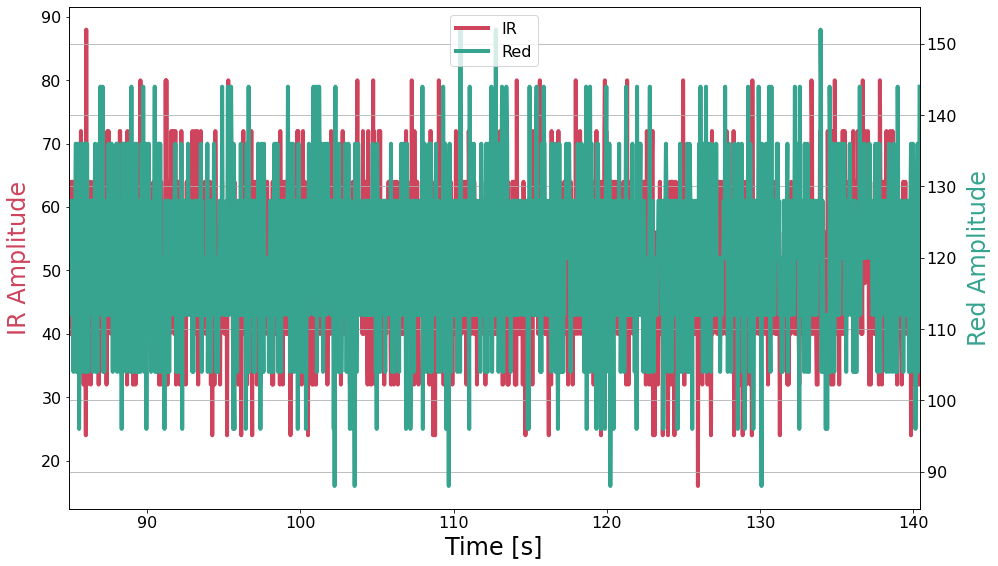

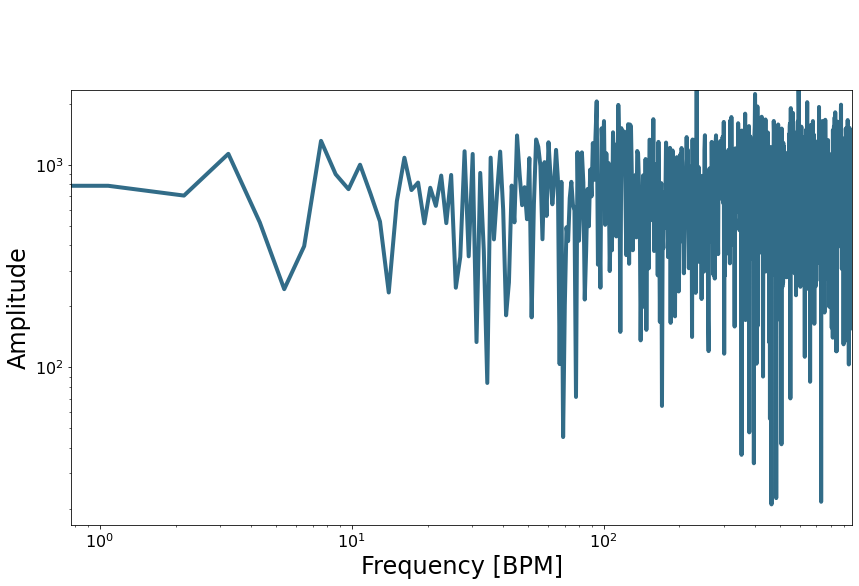

In [386]:
## plotting time series data
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time [s]',fontsize=24)
ax1.set_ylabel('IR Amplitude',fontsize=24,color='#CE445D',labelpad=10)
ax1.tick_params(axis='both',which='major',labelsize=16)
plt1 = ax1.plot(t_vec,ir_vec,label='IR',color='#CE445D',linewidth=4)
ax1_2 = plt.twinx()
ax1_2.grid('off')
ax1_2.set_ylabel('Red Amplitude',fontsize=24,color='#37A490',labelpad=10)
ax1_2.tick_params(axis='y',which='major',labelsize=16)
plt2 = ax1_2.plot(t_vec,red_vec,label='Red',color='#37A490',linewidth=4)
lns = plt1+plt2
labels = [l.get_label() for l in lns]
ax1_2.legend(lns,labels,fontsize=16,loc='upper center')
plt.xlim([t_vec[0],t_vec[-1]])
plt.tight_layout(pad=1.2)

## FFT and plotting frequency spectrum of data
f_vec = np.arange(0,int(len(t_vec)/2))*(samp_rate/(len(t_vec)))
f_vec = f_vec*60
fft_var = np.fft.fft(red_vec)
x,y,z = np.abs(fft_var[0]),2.0*np.abs(fft_var[1:int(len(fft_var)/2)]),np.abs(fft_var[int(len(fft_var)/2)])
fft_var = np.append(y,z)

bpm_max_loc = np.argmin(np.abs(f_vec-heart_rate_range[1]))
f_step = 1
f_max_loc = np.argmax(fft_var[f_step:bpm_max_loc])+f_step
print('BPM: {0:2.1f}'.format(f_vec[f_max_loc]))
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(111)
ax2.loglog(f_vec,fft_var,color=[50/255,108/255,136/255],linewidth=4)
ax2.set_xlim([0,f_vec[-1]])
ax2.set_ylim([np.min(fft_var)-np.std(fft_var),np.max(fft_var)])
ax2.tick_params(axis='both',which='major',labelsize=16)
ax2.set_xlabel('Frequency [BPM]',fontsize=24)
ax2.set_ylabel('Amplitude',fontsize=24)
ax2.annotate('Heart Rate: {0:2.0f} BPM'.format(f_vec[f_max_loc]),
             xy = (f_vec[f_max_loc],fft_var[f_max_loc]+(np.std(fft_var)/10)),xytext=(-10,70),
             textcoords='offset points',arrowprops=dict(facecolor='k'),
             fontsize=16,horizontalalignment='center')
fig2.savefig('max30102_fft_heart_rate.png',dpi=300,facecolor=[252/255,252/255,252/255])
plt.show()

## Using Gradient Appx

In [387]:
heart_rate_span = [10,250] # max span of heart rate
pts = 1800 # points used for peak finding (400 Hz, I recommend at least 4s (1600 pts)
smoothing_size = 20 # convolution smoothing size

    
# convolve, calculate gradient, and remove bad endpoints

t_vals,y_vals = [], []

samp_rate = 1/np.mean(np.diff(t_vals)) # average sample rate for determining peaks
min_time_bw_samps = (60.0/heart_rate_span[1])

t_vals = t_vec
y_vals = red_vec

y_vals = np.convolve(y_vals,np.ones((smoothing_size,)),'same')/smoothing_size
red_grad = np.gradient(y_vals,t_vals)
red_grad[0:int(smoothing_size/2)+1] = np.zeros((int(smoothing_size/2)+1,))
red_grad[-int(smoothing_size/2)-1:] = np.zeros((int(smoothing_size/2)+1,))  

y_vals = np.append(np.repeat(y_vals[int(smoothing_size/2)],int(smoothing_size/2)),y_vals[int(smoothing_size/2):-int(smoothing_size/2)])
y_vals = np.append(y_vals,np.repeat(y_vals[-int(smoothing_size/2)],int(smoothing_size/2)))


print(y_vals)

# peak locator algorithm
peak_locs = np.where(red_grad<-np.std(red_grad))

prev_pk = peak_locs[0][0]
true_peak_locs,pk_loc_span = [],[]
for ii in peak_locs[0]:
    y_pk = y_vals[ii]
    if (t_vals[ii]-t_vals[prev_pk])<min_time_bw_samps:
        pk_loc_span.append(ii)
    else:
        if pk_loc_span==[]:
            true_peak_locs.append(ii)
        else:
            true_peak_locs.append(int(np.mean(pk_loc_span)))
            pk_loc_span = []

    prev_pk = int(ii)

t_peaks = [t_vals[kk] for kk in true_peak_locs]
# if t_peaks==[]:
#     continue
# else:
print('BPM: {0:2.1f}'.format(60.0/np.mean(np.diff(t_peaks))))

#plt.pause(0.001)
#savefig = input("Save Figure? ")

#time.sleep(0.005)

[121.6 121.6 121.6 ... 118.8 118.8 118.8]
BPM: 81.8


/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ameyadahale/virtualenv/v1/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [388]:
y_vals

array([121.6, 121.6, 121.6, ..., 118.8, 118.8, 118.8])